<a href="https://colab.research.google.com/github/bominwang/MCMC_library/blob/main/Markov_Chain_SteadyState.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A demo for illustrete the steady state nature of Markov Chains**

According to income levels, individuals can be categorized into low-income, middle-income, and high-income levels. Assuming that the income level of offspring is significantly influenced by their parental generation, the transition probabilities between these levels can be described using a state transition matrix. Assuming the transition matrix is as follows:


\
\begin{matrix}
 & \text{Low Income} & \text{Middle Income} & \text{High Income} \\
\text{Low Income} & P_{LL} & P_{LM} & P_{LH} \\
\text{Middle Income} & P_{ML} & P_{MM} & P_{MH} \\
\text{High Income} & P_{HL} & P_{HM} & P_{HH} \\
\end{matrix}


In this matrix:
- $P_{LL}$ represents the probability of transitioning from low income to low income.
- $P_{LM}$ represents the probability of transitioning from low income to middle income.
- $P_{LH}$ represents the probability of transitioning from low income to high income.
- $P_{ML}$ represents the probability of transitioning from middle income to low income.
- $P_{MM}$ represents the probability of transitioning from middle income to middle income.
- $P_{MH}$ represents the probability of transitioning from middle income to high income.
- $P_{HL}$ represents the probability of transitioning from high income to low income.
- $P_{HM}$ represents the probability of transitioning from high income to middle income.
- $P_{HH}$ represents the probability of transitioning from high income to high income.

Suppose the initial distribution proportions $\pi_{0}$ within the current population are as follows:

\begin{bmatrix}
0.21 & 0.68 & 0.11
\end{bmatrix}

the transform matrix of state as follows :

\begin{bmatrix}
0.65 & 0.28 & 0.07 \\
0.15 & 0.67 & 0.18 \\
0.12 & 0.36 & 0.52 \\
\end{bmatrix}

The convergence process of a Markov chain can be observed based on the following functions.

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


Transform matrix:
 [[0.65 0.28 0.07]
 [0.15 0.67 0.18]
 [0.12 0.36 0.52]]
Initial state is: 
 [[0.21 0.68 0.11]]
the 0-th state is [[0.2517 0.554  0.1943]]
the 10-th state is [[0.28646357 0.4885367  0.22499973]]
the 20-th state is [[0.28650132 0.4885216  0.22497708]]
the 30-th state is [[0.28650138 0.48852158 0.22497704]]
the 40-th state is [[0.28650138 0.48852158 0.22497704]]
the 50-th state is [[0.28650138 0.48852158 0.22497704]]
the 60-th state is [[0.28650138 0.48852158 0.22497704]]
the 70-th state is [[0.28650138 0.48852158 0.22497704]]
the 80-th state is [[0.28650138 0.48852158 0.22497704]]
the 90-th state is [[0.28650138 0.48852158 0.22497704]]


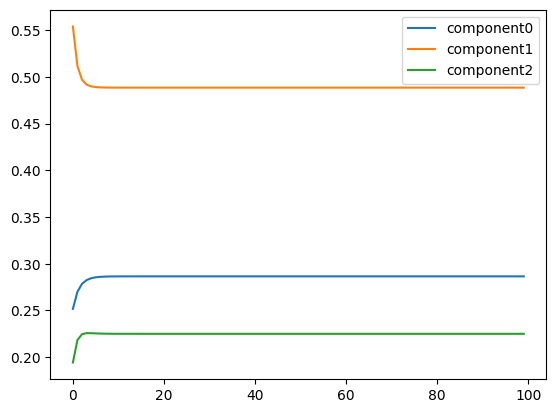

Time taken (NumPy): 0.19352197647094727 seconds
the 0-th state is [[0.2517 0.554  0.1943]]
the 10-th state is [[0.28646357 0.4885367  0.22499973]]
the 20-th state is [[0.28650132 0.4885216  0.22497708]]
the 30-th state is [[0.28650138 0.48852158 0.22497704]]
the 40-th state is [[0.28650138 0.48852158 0.22497704]]
the 50-th state is [[0.28650138 0.48852158 0.22497704]]
the 60-th state is [[0.28650138 0.48852158 0.22497704]]
the 70-th state is [[0.28650138 0.48852158 0.22497704]]
the 80-th state is [[0.28650138 0.48852158 0.22497704]]
the 90-th state is [[0.28650138 0.48852158 0.22497704]]


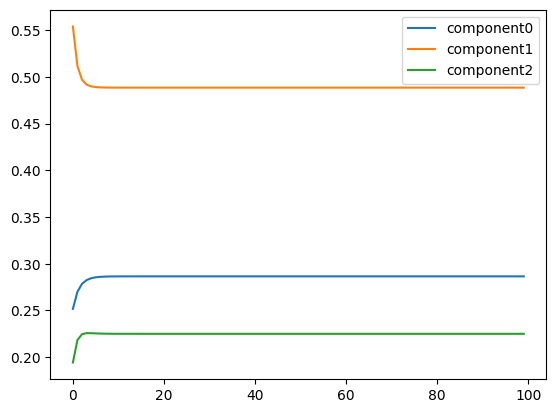

Time taken (Cupy): 0.2075977325439453 seconds
the steady state is [[0.28650138 0.48852158 0.22497704]]


In [20]:
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
import time

def state_transform(transform_matrix, initial_state, steps_transform=1000, adaptive_flag=False, cp_flag=False):
    if cp_flag:
        initial_state = cp.array(initial_state.reshape(1, -1))
        transform_matrix = cp.array(transform_matrix.reshape(initial_state.shape[1], initial_state.shape[1]))
        history = cp.zeros(shape=[steps_transform, initial_state.shape[1]], dtype=cp.float32)
    else:
        initial_state = np.array(initial_state.reshape(1, -1))
        transform_matrix = np.array(transform_matrix.reshape(initial_state.shape[1], initial_state.shape[1]))
        history = np.zeros(shape=[steps_transform, initial_state.shape[1]], dtype=np.float32)

    if adaptive_flag is False:
        final_state = initial_state
        for i in range(steps_transform):
            if cp_flag:
                final_state = cp.dot(final_state, transform_matrix)
            else:
                final_state = np.dot(final_state, transform_matrix)

            history[i, :] = final_state.squeeze()

            if i % 10 == 0:
                print(f'the {i}-th state is {final_state}')
        if cp_flag:
          plt.figure()
          for dim in range(initial_state.shape[1]):
            plt.plot([i for i in range(steps_transform)], history[:, dim].get(), label=f'component{dim}')
          plt.legend()
          plt.show()

        else:
          plt.figure()
          for dim in range(initial_state.shape[1]):
            plt.plot([i for i in range(steps_transform)], history[:, dim], label=f'component{dim}')
          plt.legend()
          plt.show()


    else:
      final_state = initial_state
      state_last = None
      while state_last is None or not (cp.array_equal(final_state, state_last) if cp_flag else np.array_equal(final_state, state_last)):
        state_last = cp.copy(final_state) if cp_flag else np.copy(final_state)
        if cp_flag:
            final_state = cp.dot(final_state, transform_matrix)
        else:
            final_state = np.dot(final_state, transform_matrix)

      print(f'the steady state is {final_state}')

    return final_state

if __name__ == '__main__':
    # Numpy
    P = np.array([[0.65, 0.28, 0.07],[0.15, 0.67, 0.18],[0.12, 0.36, 0.52]]).reshape(3, 3)
    print(f'Transform matrix:\n {P}')
    initial = np.array([0.21,0.68,0.11]).reshape(1, 3)
    print(f'Initial state is: \n {initial}')
    start_time = time.time()
    final_state = state_transform(transform_matrix=P, initial_state=initial, steps_transform=100, adaptive_flag=False)
    end_time = time.time()
    print(f'Time taken (NumPy): {end_time - start_time} seconds')
    # Cupy
    P = cp.array([[0.65, 0.28, 0.07],[0.15, 0.67, 0.18],[0.12, 0.36, 0.52]]).reshape(3, 3)
    initial = cp.array([0.21,0.68,0.11]).reshape(1, 3)
    start_time = time.time()
    final_state = state_transform(transform_matrix=P, initial_state=initial, steps_transform=100, adaptive_flag=False, cp_flag =True)
    end_time = time.time()
    print(f'Time taken (Cupy): {end_time - start_time} seconds')
    final_state = state_transform(transform_matrix=P, initial_state=initial, adaptive_flag=True, cp_flag =True)